# Audio Binary Classification using Convolutional Neural Network

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras import regularizers, optimizers
from keras.callbacks import EarlyStopping
import keras.backend as K
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from datetime import datetime
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
from IPython.display import Image
import IPython.display as ipd
from glob import glob
import glob 
import os
import gc
import random
from random import randint
import itertools
import shutil
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Using TensorFlow backend.


In [2]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install soundfile

In [4]:
pip install PySoundFile

  Using cached PySoundFile-0.9.0.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl (671 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\_soundfile_data\\libsndfile64bit.dll'
Consider using the `--user` option or check the permissions.



# 1. Audio Preparation for CNNs

In [5]:
n_train = 500
n_valid = 100
n_test = 50

In [6]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\male_set')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\male1') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\male1')
    
    for i in random.sample(glob.glob('male*'), n_train):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\male1')  
os.chdir('../../')

In [7]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\female_set')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\female1') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\female1')
    
    for i in random.sample(glob.glob('female*'), n_train):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\female1')  
os.chdir('../../')

In [8]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\male_set')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\male2') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\male2')
    
    for i in random.sample(glob.glob('male*'), n_valid):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\male2')  
os.chdir('../../')

In [9]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\female_set')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\female2') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\female2')
    
    for i in random.sample(glob.glob('female*'), n_valid):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\female2')  
os.chdir('../../')

In [10]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\male_set')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\male3') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\male3')
    
    for i in random.sample(glob.glob('male*'), n_test):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\male3')  
os.chdir('../../')

In [11]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\female_set')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\female3') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\female3')
    
    for i in random.sample(glob.glob('female*'), n_test):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\female3')  
os.chdir('../../')

## 1.1. Reading the files from our folder and creating a dataframes from it

In [12]:
#list the files
filelist1 = os.listdir('C:\\Users\\רועי\\data\\male-vs-female\\male1') 

In [13]:
len(filelist1)

500

In [14]:
#read them into pandas
df_male1 = pd.DataFrame(filelist1)
df_male1.head()

,0
0,male.10.mp3
1,male.1002.mp3
2,male.1006.mp3
3,male.1013.mp3
4,male.1018.mp3


In [15]:
# Adding the 1 label to the dataframe representing male
df_male1['label']='1'
df_male1.head()

,0,label
0,male.10.mp3,1
1,male.1002.mp3,1
2,male.1006.mp3,1
3,male.1013.mp3,1
4,male.1018.mp3,1


In [16]:
# Renaming the column name to file
df_male1 = df_male1.rename(columns={0:'file'})
df_male1.head()

,file,label
0,male.10.mp3,1
1,male.1002.mp3,1
2,male.1006.mp3,1
3,male.1013.mp3,1
4,male.1018.mp3,1


In [17]:
i = random.choice(df_male1.file)
i

'male.1713.mp3'

In [18]:
ipd.Audio("C:\\Users\\רועי\\data\\male-vs-female\\male1\\" + str(i))

In [19]:
# Checking for a file that gets automatically generated and we need to drop 
df_male1[df_male1['file']=='.DS_Store']

,file,label


In [20]:
filelist2 = os.listdir('C:\\Users\\רועי\\data\\male-vs-female\\female1') 

In [21]:
#read them into pandas
df_female1 = pd.DataFrame(filelist2)
df_female1.head()

,0
0,female.0.mp3
1,female.1000.mp3
2,female.1001.mp3
3,female.101.mp3
4,female.1011.mp3


In [22]:
len(filelist2)

500

In [23]:
filelist2[0:5]

['female.0.mp3',
 'female.1000.mp3',
 'female.1001.mp3',
 'female.101.mp3',
 'female.1011.mp3']

In [24]:
# Adding the 0 label to the dataframe representing female
df_female1['label']='0'
df_female1.head()

,0,label
0,female.0.mp3,0
1,female.1000.mp3,0
2,female.1001.mp3,0
3,female.101.mp3,0
4,female.1011.mp3,0


In [25]:
df_female1 = df_female1.rename(columns={0:'file'})
df_female1.head()

,file,label
0,female.0.mp3,0
1,female.1000.mp3,0
2,female.1001.mp3,0
3,female.101.mp3,0
4,female.1011.mp3,0


In [26]:
i = random.choice(df_female1.file)
i

'female.16.mp3'

In [27]:
ipd.Audio("C:\\Users\\רועי\\data\\male-vs-female\\female1\\" + str(i))

In [28]:
# Checking for a file that gets automatically generated and we need to drop 
df_female1[df_female1['file']=='.DS_Store']

,file,label


In [29]:
filelist3 = os.listdir('C:\\Users\\רועי\\data\\male-vs-female\\male2') 
df_male2 = pd.DataFrame(filelist3)
df_male2['label']='1'
df_male2 = df_male2.rename(columns={0:'file'})
df_male2[df_male2['file']=='.DS_Store']

filelist4 = os.listdir('C:\\Users\\רועי\\data\\male-vs-female\\female2') 
df_female2 = pd.DataFrame(filelist4)
df_female2['label']='0'
df_female2 = df_female2.rename(columns={0:'file'})
df_female2[df_female2['file']=='.DS_Store']

,file,label


In [30]:
filelist5 = os.listdir('C:\\Users\\רועי\\data\\male-vs-female\\male3') 
df_male3 = pd.DataFrame(filelist5)
df_male3['label']='1'
df_male3 = df_male3.rename(columns={0:'file'})
df_male3[df_male3['file']=='.DS_Store']

filelist6 = os.listdir('C:\\Users\\רועי\\data\\male-vs-female\\female3') 
df_female3 = pd.DataFrame(filelist6)
df_female3['label']='0'
df_female3 = df_female3.rename(columns={0:'file'})
df_female3[df_female3['file']=='.DS_Store']

,file,label


## 1.2. Spliting the audio files

In [31]:
df_train = pd.concat([df_female1, df_male1], ignore_index=True)
df_train.head()

,file,label
0,female.0.mp3,0
1,female.1000.mp3,0
2,female.1001.mp3,0
3,female.101.mp3,0
4,female.1011.mp3,0


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    1000 non-null   object
 1   label   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [33]:
# Randomizing our files to be able to split into train, validation and test
df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_train.head()

,file,label
0,male.1075.mp3,1
1,male.1871.mp3,1
2,male.1895.mp3,1
3,male.1613.mp3,1
4,female.635.mp3,0


In [34]:
df_train['label'].value_counts(normalize=True)

1    0.5
0    0.5
Name: label, dtype: float64

In [35]:
df_valid = pd.concat([df_female2, df_male2], ignore_index=True)
df_valid = df_valid.sample(frac=1, random_state=42).reset_index(drop=True)
df_valid['label'].value_counts(normalize=True)

1    0.5
0    0.5
Name: label, dtype: float64

In [36]:
df_valid = pd.concat([df_female2, df_male2], ignore_index=True)
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    200 non-null    object
 1   label   200 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [37]:
df_valid = df_valid.sample(frac=1, random_state=42).reset_index(drop=True)
df_valid.head()

,file,label
0,female.957.mp3,0
1,female.1347.mp3,0
2,female.1612.mp3,0
3,male.2028.mp3,1
4,male.1448.mp3,1


In [38]:
df_valid['label'].value_counts(normalize=True)

1    0.5
0    0.5
Name: label, dtype: float64

In [39]:
df_test = pd.concat([df_female3, df_male3], ignore_index=True)
df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)
df_test['label'].value_counts(normalize=True)

1    0.5
0    0.5
Name: label, dtype: float64

## 1.3. Visualizing the melspectrograms

In [40]:
# Randomly choosing one of the audio files
i = random.choice(df_female1.file)
i
filename = "C:\\Users\\רועי\\data\\male-vs-female\\female1\\" + str(i)
filename

'C:\\Users\\רועי\\data\\male-vs-female\\female1\\female.272.mp3'

C:\ProgramData\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


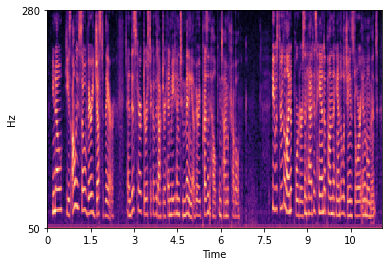

In [41]:
# Checking how the image looks like with the frequency restriction
X, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')
S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
plt.show()

In [42]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\male1')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_train') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\voice_images_train')
    
    for i in random.sample(glob.glob('male*'), n_train):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_train')  
os.chdir('../../')

In [43]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\female1')
for i in random.sample(glob.glob('female*'), n_train):
    shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_train')  
os.chdir('../../')

In [44]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\voice_images_train") # dir is your directory path
number_files = len(list)
print (number_files)

1000


In [45]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\male2')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_valid') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\voice_images_valid')
    
    for i in random.sample(glob.glob('male*'), n_valid):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_valid')  
os.chdir('../../')

In [46]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\female2')
for i in random.sample(glob.glob('female*'), n_valid):
    shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_valid')  
os.chdir('../../')

In [47]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\voice_images_valid") # dir is your directory path
number_files = len(list)
print (number_files)

200


In [48]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\male3')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_test') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\voice_images_test')
    
    for i in random.sample(glob.glob('male*'), n_test):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_test')  
os.chdir('../../')

In [49]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\female3')
for i in random.sample(glob.glob('female*'), n_test):
    shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_test')  
os.chdir('../../')

In [50]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\voice_images_test") # dir is your directory path
number_files = len(list)
print (number_files)

100


In [51]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 18 (sources in the READ.ME)

def train_images(files):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    audiofile = os.path.join(os.path.abspath('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_train')+'/'+str(files.file))
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    # Setting min and max frequency to account for human voice frequency
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = files.file
    file  = 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_train\\' + str(name) + '.jpg'
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

In [52]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 18 (sources in the READ.ME)

def valid_images(files):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    audiofile = os.path.join(os.path.abspath('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_valid')+'/'+str(files.file))
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    # Setting min and max frequency to account for human voice frequency
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = files.file
    file  = 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_valid\\' + str(name) + '.jpg'
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

In [53]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 18 (sources in the READ.ME)

def test_images(files):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    audiofile = os.path.join(os.path.abspath('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_test')+'/'+str(files.file))
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    # Setting min and max frequency to account for human voice frequency
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = files.file
    file  = 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_test\\' + str(name) + '.jpg'
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

Now we load the dataframe and slice the data into train, validation and testing data like before. 

In [54]:
train_n1 = n_train*2
valid_n1 = n_valid*2
test_n1 =  n_test*2

In [55]:
train = df_train
valid = df_valid
test = df_test

We use the function to create all the images from train, val and test

In [56]:
# Code to start the timer to see how long it takes to extract the features
startTime = datetime.now()

In [57]:
train.apply(train_images, axis=1);

In [58]:
valid.apply(valid_images, axis=1);

In [59]:
test.apply(test_images, axis=1); 

In [60]:
plt.close('all')

In [61]:
# Code to see how long it took
print(datetime.now() - startTime)

0:04:11.931114


In [62]:
# Code to let us know when the code finishes running
os.system('say -v Juan ya acabé');

We will use the datagen.flow_from_dataframe from the keras documentation to use with the CNN https://keras.io/preprocessing/image/

In [63]:
# Function to change the file names to the image names to use them later 
def make_jpg(files):
    return str(files.split('.')[0])+'.mp3.jpg'

In [64]:
train['file'] = train['file'].apply(make_jpg)

In [65]:
valid['file'] = valid["file"].apply(make_jpg)

In [66]:
test['file'] = test["file"].apply(make_jpg)

In [67]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_train')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\train') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\train')
    
    for i in random.sample(glob.glob('*.jpg'), train_n1):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\train')  
os.chdir('../../')

In [68]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\train')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\train\\male') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\train\\male')
    
    for i in random.sample(glob.glob('male*'), n_train):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\train\\male')  
os.chdir('../../')

In [69]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\train')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\train\\female') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\train\\female')
    
    for i in random.sample(glob.glob('female*'), n_train):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\train\\female')  
os.chdir('../../')

In [70]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\train')
for i in random.sample(glob.glob('male*'), 2):
    shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\train\\male')  
os.chdir('../../')

In [71]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\train')
for i in random.sample(glob.glob('female*'), 2):
    shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\train\\female')  
os.chdir('../../')

In [72]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\train\\male") # dir is your directory path
number_files = len(list)
print (number_files)

500


In [73]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\train\\female") # dir is your directory path
number_files = len(list)
print (number_files)

500


In [74]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_valid')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\valid') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\valid')
    
    for i in random.sample(glob.glob('*.jpg'), valid_n1):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\valid')  
os.chdir('../../')

In [75]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\valid')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\valid\\male') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\valid\\male')
    
    for i in random.sample(glob.glob('male*'), n_valid):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\valid\\male')  
os.chdir('../../')

In [76]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\valid')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\valid\\female') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\valid\\female')
    
    for i in random.sample(glob.glob('female*'), n_valid):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\valid\\female')  
os.chdir('../../')

In [77]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\valid')
for i in random.sample(glob.glob('male*'), 2):
    shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\valid\\male')  
os.chdir('../../')

In [78]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\valid')
for i in random.sample(glob.glob('female*'), 2):
    shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\valid\\female')  
os.chdir('../../')

In [79]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\valid\\male") # dir is your directory path
number_files = len(list)
print (number_files)

100


In [80]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\valid\\female") # dir is your directory path
number_files = len(list)
print (number_files)

100


In [81]:
# Organize data into train directories
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_test')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\test') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\test')
    
    for i in random.sample(glob.glob('*.jpg'), test_n1):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\test')  
os.chdir('../../')

In [82]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\test')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\test\\male') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\test\\male')
    
    for i in random.sample(glob.glob('male*'), n_test):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\test\\male')  
os.chdir('../../')

In [83]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\test')
if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\test\\female') is False:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\test\\female')
    
    for i in random.sample(glob.glob('female*'), n_test):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\test\\female')  
os.chdir('../../')

In [84]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\test')
for i in random.sample(glob.glob('male*'), 2):
    shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\test\\male')  
os.chdir('../../')

In [85]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\test')
for i in random.sample(glob.glob('female*'), 2):
    shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\test\\female')  
os.chdir('../../')

In [86]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\test\\male") # dir is your directory path
number_files = len(list)
print (number_files)

50


In [87]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\test\\female") # dir is your directory path
number_files = len(list)
print (number_files)

50


In [88]:
train_path = 'C:\\Users\\רועי\\data\\male-vs-female\\train'
valid_path = 'C:\\Users\\רועי\\data\\male-vs-female\\valid'
test_path = 'C:\\Users\\רועי\\data\\male-vs-female\\test'

In [89]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(224,224), classes=['female','male'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['female','male'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
.flow_from_directory(directory=test_path,  target_size=(224,224), classes=['female','male'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [90]:
assert train_batches.n == train_n1
assert valid_batches.n == valid_n1
assert test_batches.n == test_n1
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [91]:
imgs, labels = next(train_batches)

In [92]:
# plot images in the form of a 1 by 10 grid and resize img to 20x20
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

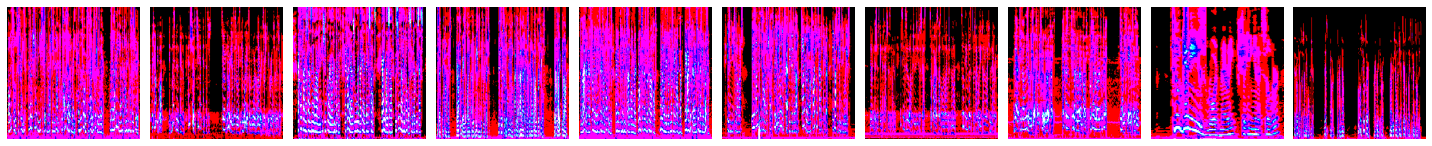

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [93]:
plotImages(imgs)
print(labels)

# 2. Build and Train a CNN for Image Processing

In [94]:
pysical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(pysical_devices))

Num GPUs Available:  0


In [95]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [97]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [98]:
X_train = train_batches
y_train = train_batches.classes
X_valid = valid_batches
y_valid = valid_batches.classes

In [99]:
model.fit(x=X_train, validation_data=X_valid, epochs=10, verbose=2)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 20 steps
Epoch 1/10
100/100 - 47s - loss: 9.0971 - accuracy: 0.8350 - val_loss: 0.8560 - val_accuracy: 0.9450
Epoch 2/10
100/100 - 41s - loss: 1.2567 - accuracy: 0.9430 - val_loss: 1.2634 - val_accuracy: 0.9400
Epoch 3/10
100/100 - 43s - loss: 0.4606 - accuracy: 0.9770 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4/10
100/100 - 42s - loss: 0.0558 - accuracy: 0.9940 - val_loss: 0.0983 - val_accuracy: 0.9850
Epoch 5/10
100/100 - 42s - loss: 4.3049e-07 - accuracy: 1.0000 - val_loss: 0.0969 - val_accuracy: 0.9850
Epoch 6/10
100/100 - 40s - loss: 3.8604e-07 - accuracy: 1.0000 - val_loss: 0.0971 - val_accuracy: 0.9850
Epoch 7/10
100/100 - 41s - loss: 3.4446e-07 - accuracy: 1.0000 - val_loss: 0.0974 - val_accuracy: 0.9850
Epoch 8/10
100/100 - 42s - loss: 3.0906e-07 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9850
Epoch 9/10
100/100 - 41s - loss: 2.7724e-07 - accuracy: 1.0000 - val_loss: 0.0979 -

# 3. CNN Predictions with TensorFlow's Keras

## 3.1. Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

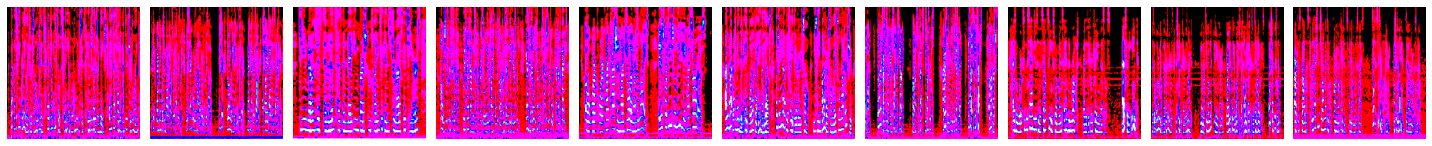

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [100]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [101]:
X_test = test_batches
y_test = test_batches.classes

In [102]:
predictions = model.predict(x=X_test)

10/10 - 6s


In [103]:
rounded_predictions = np.argmax(np.round(predictions), axis=-1)  

In [104]:
y_pred=rounded_predictions

## 3.2 Confusion Matrix

In [105]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [106]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[49  1]
 [ 0 50]]


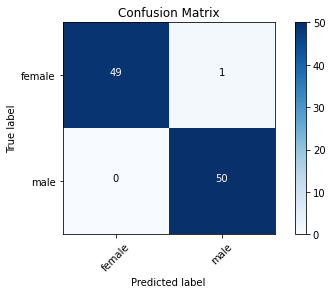

In [107]:
cm_plot_labels = ['female','male']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [108]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  99 correct predictions.
 The result is telling us that we have:  1 incorrect predictions.
 We have a total predictions of:  100


## 3.3 Classification Report

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [110]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of the CNN model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the CNN model: 99.00%

Well, you got a classification rate of 99.00%


In [111]:
#calculate Precision
print("Precision of the CNN model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("\nPrecision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our CNN model predicted a voice belongs to a male, that voice actually belongs to a male", "{:.2%}".format(metrics.precision_score(y_test, y_pred)), "of the time.ow often it") 

Precision of the CNN model: 98.04%

Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our CNN model predicted a voice belongs to a male, that voice actually belongs to a male 98.04% of the time.ow often it


In [112]:
#calculate Recall
print("Recall of the CNN model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("\nRecall:  If there is a voice which belong to a male in the test set, our CNN model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))

Recall of the CNN model: 100.00%

Recall:  If there is a voice which belong to a male in the test set, our CNN model can identify it 100.00%


## 3.4 ROC AUC Curve

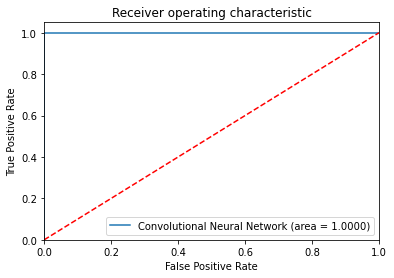

In [113]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
cnn_roc_auc = roc_auc_score(y_test, model.predict(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Convolutional Neural Network (area = %0.4f)' % cnn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CNN_ROC')
plt.show()

# 4. Deploy the CNN

In [114]:
randy = randint(0,1)
if randy == 0:
    os.chdir('C:\\Users\רועי\\data\\male-vs-female\\female_set')
    if os.path.isdir('C:\\Users\רועי\\data\\male-vs-female\\pred\\female') is False:
        os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\pred\\female')
        for i in random.sample(glob.glob('female*'), 1):
            shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\pred\\female')  
    os.chdir('../../')
else:
    os.chdir('C:\\Users\רועי\\data\\male-vs-female\\male_set')
    if os.path.isdir('C:\\Users\רועי\\data\\male-vs-female\\pred\\male') is False:
        os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\pred\\male')
        for i in random.sample(glob.glob('male*'), 1):
            shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\pred\\male')  
    os.chdir('../../')

In [115]:
#list the files
if randy == 0:
    filelist7 = os.listdir("C:\\Users\\רועי\\data\\male-vs-female\\pred\\female") 
else:
    filelist7 = os.listdir("C:\\Users\\רועי\\data\\male-vs-female\\pred\\male") 

In [116]:
filelist7

['male.985.mp3']

In [117]:
#read them into pandas
df_pred = pd.DataFrame(filelist7)
df_pred.head()

,0
0,male.985.mp3


In [118]:
# Renaming the column name to file
df_pred = df_pred.rename(columns={0:'file'})
df_pred.head()

,file
0,male.985.mp3


In [119]:
len(df_pred.file)

1

In [120]:
# Checking for a file that gets automatically generated and we need to drop 
df_pred[df_pred['file']=='.DS_Store']

,file


In [121]:
if randy == 0:
    os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\pred\\female')
    if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_real') is False:
        os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\voice_images_real')
    
    for i in random.sample(glob.glob('*'), 1):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_real')  
    os.chdir('../../')
else:
    os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\pred\\male')
    if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_real') is False:
        os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\voice_images_real')
    
    for i in random.sample(glob.glob('*'), 1):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_real')  
    os.chdir('../../')

In [122]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 18 (sources in the READ.ME)

def real_images(files):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    audiofile = os.path.join(os.path.abspath('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_real')+'/'+str(files.file))
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    # Setting min and max frequency to account for human voice frequency
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel', fmin=50, fmax=280)
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = files.file
    file  = 'C:\\Users\\רועי\\data\\male-vs-female\\voice_images_real\\' + str(name) + '.jpg'
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

In [123]:
# Code to start the timer to see how long it takes to extract the features
startTime = datetime.now()

In [124]:
real = df_pred
real.apply(real_images, axis=1); 
plt.close('all')
# Code to let us know when the code finishes running
os.system('say -v Juan ya acabé');
real['file'] = real["file"].apply(make_jpg)

C:\ProgramData\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


In [125]:
# Code to see how long it took
print(datetime.now() - startTime)

0:00:00.263441


In [126]:
if randy == 0:
    os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_real')
    if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\pred\\female') is False:
        os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\pred\\female')
    for i in random.sample(glob.glob('*.jpg'), 1):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\pred\\female')  
    os.chdir('../../')
else:
    os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\voice_images_real')
    if os.path.isdir('C:\\Users\\רועי\\data\\male-vs-female\\pred\\male') is False:
        os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\pred\\male')
    
    for i in random.sample(glob.glob('*.jpg'), 1):
        shutil.move(i, 'C:\\Users\\רועי\\data\\male-vs-female\\pred\\male')  
    os.chdir('../../')

In [127]:
if randy != 0:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\pred\\female')
    os.chdir('../../')
else:
    os.makedirs('C:\\Users\רועי\\data\\male-vs-female\\pred\\male')
    os.chdir('../../')

In [128]:
pred_path = 'C:\\Users\רועי\\data\\male-vs-female\\pred'


if randy == 0:
    pred_pic1 = 'C:\\Users\רועי\\data\\male-vs-female\\pred\\female' 
else:
    pred_pic1 = 'C:\\Users\רועי\\data\\male-vs-female\\pred\\male'
    
pred_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=pred_path, target_size=(224,224),   classes=['female','male'], batch_size=10, shuffle=False)

assert pred_batches.n == 1
assert pred_batches.num_classes == 2

Found 1 images belonging to 2 classes.


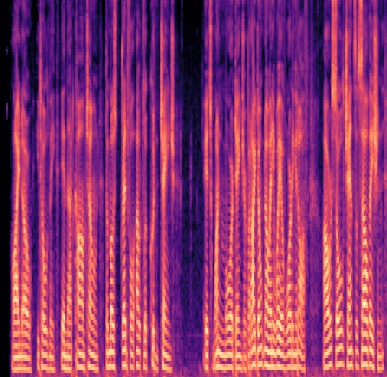

In [129]:
from IPython.display import Image
if randy == 0:
    os.chdir('C:\\Users\רועי\\data\\male-vs-female\\pred\\female')
    for i in random.sample(glob.glob('*'), 1):
        Image(filename=i)
else:
    os.chdir('C:\\Users\רועי\\data\\male-vs-female\\pred\\male')
    for i in random.sample(glob.glob('*'), 1):
        Image(filename=i)
        
Image(filename=i)

In [130]:
if randy == 0:
    print("\033[1m This spectogram belongs to a female voice")
else:
    print("\033[1m This spectogram belongs to a male voice")

 This spectogram belongs to a male voice


In [131]:
X_real = pred_batches
y_real = pred_batches.classes

In [132]:
predictions_real = model.predict(x=X_real, verbose=0)

In [133]:
rounded_predictions_real = np.argmax(predictions_real, axis=-1)
if rounded_predictions_real[0] == 0:
    print("Our CNN model predicts that the new audio file we have just loaded in to it, belongs to a female")
else:
    print("Our CNN model predicts that the new audio file we have just loaded in to it, belongs to a male")

Our CNN model predicts that the new audio file we have just loaded in to it, belongs to a male


In [134]:
print("Baded on our CNN model there is a", "{:.2%}".format(predictions_real[0][0]), "that the new audio file we have just loaded in to it, belongs to a female")
print("Baded on our CNN model there is a", "{:.2%}".format(predictions_real[0][1]), "that the new audio file we have just loaded in to it, belongs to a male")

Baded on our CNN model there is a 0.00% that the new audio file we have just loaded in to it, belongs to a female
Baded on our CNN model there is a 100.00% that the new audio file we have just loaded in to it, belongs to a male


# 10. Delete the directories

In [135]:
os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\male1')
os.chdir('../../')

In [136]:
os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\female1')
os.chdir('../../')

In [137]:
os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\male2')
os.chdir('../../')

In [138]:
os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\female2')
os.chdir('../../')

In [139]:
os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\male3')
os.chdir('../../')

In [140]:
os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\female3')
os.chdir('../../')

In [141]:
if randy == 0:
    os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\pred\\male')
    os.chdir('../../')
else:
    os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\pred\\female')
    os.chdir('../../')

In [142]:
import os
import glob
if randy == 0:
    files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\pred\\female\\*')
    for f in files:
        os.remove(f)   
else:
    files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\pred\\male\\*')
    for f in files:
        os.remove(f) 

In [143]:
if randy == 0:
    os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\pred\\female')
    os.chdir('../../')
else:
    os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\pred\\male')
    os.chdir('../../')

In [144]:
import os
import glob

files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\train\\male\\*')
for f in files:
    os.remove(f)

os.rmdir('C:\\Users\רועי\\data\\male-vs-female\\train\\male')
os.chdir('../../')

In [145]:
import os
import glob

files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\train\\female\\*')
for f in files:
    os.remove(f)

os.rmdir('C:\\Users\רועי\\data\\male-vs-female\\train\\female')
os.chdir('../../')

In [146]:
os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\train')
os.chdir('../../')

In [147]:
import os
import glob

files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\valid\\male\\*')
for f in files:
    os.remove(f)

os.rmdir('C:\\Users\רועי\\data\\male-vs-female\\valid\\male')
os.chdir('../../')

In [148]:
import os
import glob

files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\valid\\female\\*')
for f in files:
    os.remove(f)

os.rmdir('C:\\Users\רועי\\data\\male-vs-female\\valid\\female')
os.chdir('../../')

In [149]:
os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\valid')
os.chdir('../../')

In [150]:
import os
import glob

files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\test\\female\\*')
for f in files:
    os.remove(f)

os.rmdir('C:\\Users\רועי\\data\\male-vs-female\\test\\female')
os.chdir('../../')

In [151]:
import os
import glob

files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\test\\male\\*')
for f in files:
    os.remove(f)

os.rmdir('C:\\Users\רועי\\data\\male-vs-female\\test\\male')
os.chdir('../../')

In [152]:
os.removedirs('C:\\Users\רועי\\data\\male-vs-female\\test')
os.chdir('../../')

In [153]:
import os
import glob

files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\voice_images_train\\*')
for f in files:
    os.remove(f)

os.rmdir('C:\\Users\רועי\\data\\male-vs-female\\voice_images_train')
os.chdir('../../')

In [154]:
import os
import glob

files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\voice_images_valid\\*')
for f in files:
    os.remove(f)

os.rmdir('C:\\Users\רועי\\data\\male-vs-female\\voice_images_valid')
os.chdir('../../')

In [155]:
import os
import glob

files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\voice_images_test\\*')
for f in files:
    os.remove(f)

os.rmdir('C:\\Users\רועי\\data\\male-vs-female\\voice_images_test')
os.chdir('../../')

In [156]:
import os
import glob

files = glob.glob('C:\\Users\רועי\\data\\male-vs-female\\voice_images_real\\*')
for f in files:
    os.remove(f)

os.rmdir('C:\\Users\רועי\\data\\male-vs-female\\voice_images_real')
os.chdir('../../')

In [157]:
import os

list = os.listdir("C:\\Users\רועי\\data\\male-vs-female\\‏‏male_original") # dir is your directory path
number_files1 = len(list)
print (number_files1)

2211


In [158]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\‏‏male_original')
for i in random.sample(glob.glob('*'), number_files1):
    shutil.copy(i, 'C:\\Users\\רועי\\data\\male-vs-female\\male_set')  
os.chdir('../../')

In [159]:
import os

list = os.listdir("C:\\Users\רועי\\data\\male-vs-female\\male_set") # dir is your directory path
number_files1 = len(list)
print (number_files1)

2211


In [160]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\‏‏female_original") # dir is your directory path
number_files2 = len(list)
print (number_files2)

2211


In [161]:
os.chdir('C:\\Users\\רועי\\data\\male-vs-female\\‏‏female_original')
for i in random.sample(glob.glob('*'), number_files1):
    shutil.copy(i, 'C:\\Users\\רועי\\data\\male-vs-female\\female_set')  
os.chdir('../../')

In [162]:
import os

list = os.listdir(r"C:\\Users\רועי\\data\\male-vs-female\\female_set") # dir is your directory path
number_files2 = len(list)
print (number_files2)

2211
